### 1d_2.ipynb
#### Additional examples of 1D range expansions.
---
Include RESK and RESKPlots:

In [8]:
include("../resk.jl")
include("../reskplots.jl")

RESK successfully loaded.
RESKPlots successfully loaded.


Let's run a simple simulation and look at the loci in `stats`:

In [2]:
a = rangeexp_ray(60,100,20;sel_coef=0.01)
a["stats"]

Dict{String, Any} with 22 entries:
  "capacity"         => 20
  "wlddim"           => 1
  "max_burnin"       => (5,)
  "name"             => "2024-09-07_02-19-26"
  "startfill"        => UnitRange{Int64}[1:5]
  "domin_coef"       => 0
  "n_gens_burnin"    => 60
  "prop_of_del_muts" => 0.9
  "migr_rate"        => 0.1
  "sel_loci"         => [120, 912, 487, 948, 680, 926, 518, 253, 119, 498  …  7…
  "max"              => (100,)
  "prolif_rate"      => 1.8
  "loci"             => [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, …
  "sel_coef"         => 0.01
  "n_gens"           => 160
  "migr_mode"        => "ort"
  "n_gens_exp"       => 100
  "mut_rate"         => 0.7567
  "n_loci"           => 1000
  ⋮                  => ⋮

If you provide the `sel_coef`, the `loci` array that defines selection coefficient for each locus will be filled with `sel_coef` by default. You can define custom selection coefficients for each locus by providing `loci`:

In [3]:
b = rangeexp_ray(60,100,20;loci=vcat(fill(0.01,50),fill(-0.01,50)))
b["stats"]

Dict{String, Any} with 22 entries:
  "capacity"         => 20
  "wlddim"           => 1
  "max_burnin"       => (5,)
  "name"             => "2024-09-07_02-21-46"
  "startfill"        => UnitRange{Int64}[1:5]
  "domin_coef"       => 0
  "n_gens_burnin"    => 60
  "prop_of_del_muts" => 0.9
  "migr_rate"        => 0.1
  "sel_loci"         => [501, 177, 652, 280, 419, 223, 408, 413, 158, 886  …  3…
  "max"              => (100,)
  "prolif_rate"      => 1.8
  "loci"             => [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, …
  "sel_coef"         => 0.002
  "n_gens"           => 160
  "migr_mode"        => "ort"
  "n_gens_exp"       => 100
  "mut_rate"         => 0.7567
  "n_loci"           => 1000
  ⋮                  => ⋮

In the example above, we have provided a set of loci, half of which is filled with positive, and half with negative selection coefficients of the same absolute value. Now let's compare these two results.

Define a custom function to neatly calculate and compare mean front fitness:

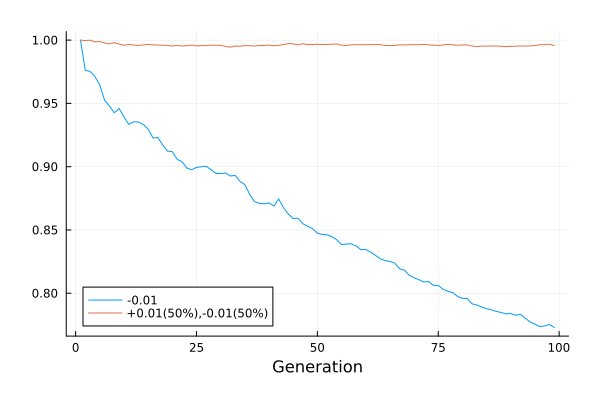

In [6]:
function analyse(re,dataname="fitn")
    re_fitn_frontav = average_front(re,dataname;oneside=true)
    re_fitn_frontav_mean = average_ts(re_fitn_frontav, re["stats"]["n_gens"])
    re_fitn_frontav_meanN = norm_onset_mean(re_fitn_frontav_mean, re["stats"]["n_gens_burnin"]+1)
    return re_fitn_frontav_meanN, re_fitn_frontav_mean
end

aa,w = analyse(a)
bb,w = analyse(b)
Plots.plot(aa[(a["stats"]["n_gens_burnin"]+2):end],label="-0.01")
Plots.plot!(bb[(b["stats"]["n_gens_burnin"]+2):end],label="+0.01(50%),-0.01(50%)",xlabel="Generation")

We can see that the contribution from -0.01 and 0.01 selection coefficients balance out in the long run, over 20 replicates. This may be false for 1 replicate:

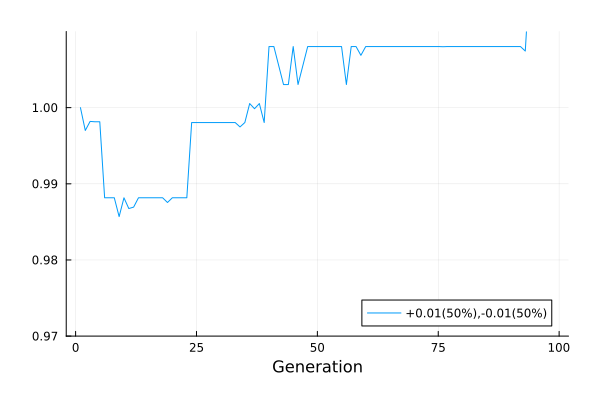

In [49]:
c_fitn_frontav = average_front(b,"fitn";oneside=true)[:,13]
c_fitn_frontav_mean = average_ts(c_fitn_frontav, b["stats"]["n_gens"])
c_fitn_frontav_meanN = norm_onset_mean(c_fitn_frontav_mean, b["stats"]["n_gens_burnin"]+1)
Plots.plot(c_fitn_frontav_meanN[(b["stats"]["n_gens_burnin"]+2):end],label="+0.01(50%),-0.01(50%)",xlabel="Generation",ylim=(0.97,1.01))

---

For two-sided 1D expansions, use the linear `rangeexp`:

In [2]:
twosi = rangeexp_linear_inf(60,100,3)

Dict{String, Any} with 9 entries:
  "AAsel" => Float32[]
  "pops"  => Float32[NaN NaN … 5.0 13.0; NaN NaN … 8.0 16.0; … ; NaN NaN … 17.0…
  "aasel" => Float32[]
  "fitn"  => Float32[NaN NaN … 0.939242 0.940465; NaN NaN … 0.944624 0.942257; …
  "aaneu" => Float32[]
  "Aasel" => Float32[]
  "Aaneu" => Float32[]
  "AAneu" => Float32[]
  "stats" => Dict{String, Any}("capacity"=>20, "wlddim"=>1, "max_burnin"=>NaN, …

(0.9321774f0, 1.0f0)


┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_Yd8z0L4BK5.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_Yd8z0L4BK5.gif")
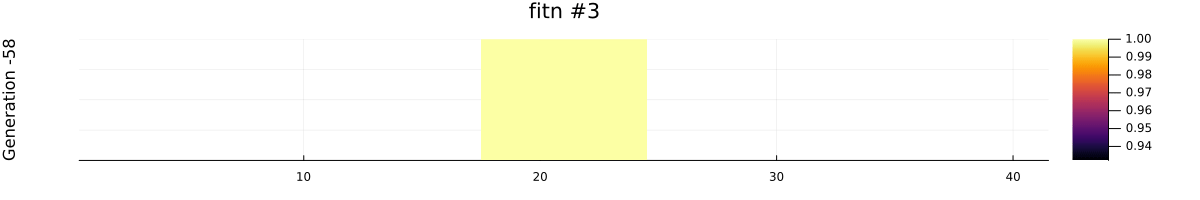

In [6]:
re_heatmap(twosi,"fitn";re_index=3)

In [13]:
twosi2 = rangeexp_linear(150,100,1; r_max_burnin=40, r_max_exp=50, n_loci=30)

Dict{String, Any} with 9 entries:
  "AAsel" => Float32[]
  "pops"  => Float32[NaN NaN … 27.0 17.0; NaN NaN … 19.0 19.0; … ; NaN NaN … 18…
  "aasel" => Float32[]
  "fitn"  => Float32[NaN NaN … 0.972511 0.972511; NaN NaN … 0.972129 0.972655; …
  "aaneu" => Float32[]
  "Aasel" => Float32[]
  "Aaneu" => Float32[]
  "AAneu" => Float32[]
  "stats" => Dict{String, Any}("capacity"=>20, "wlddim"=>1, "max_burnin"=>NaN, …

(0.97041637f0, 1.0f0)


┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_mzgXoz6P0v.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_mzgXoz6P0v.gif")
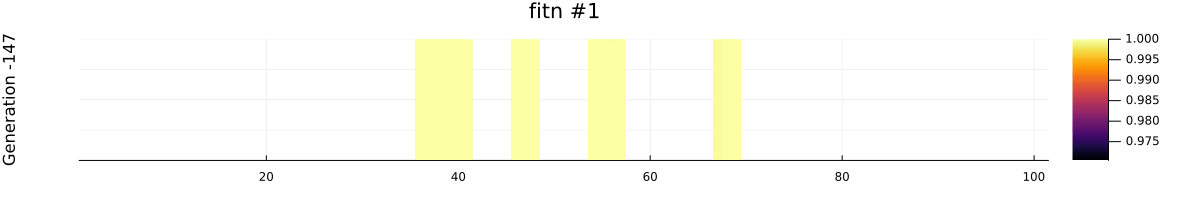

In [14]:
re_heatmap(twosi2,"fitn";slow_factor=0.5)